# Всем привет 👋🏻

Мой датасет посвящён анализу потребления алкоголя детьми в период обучения в школе.

# Описание датасета:

**school** 	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

**sex**	student's sex (binary: 'F' - female or 'M' - male)

**age**	student's age (numeric: from 15 to 22)

**address**	student's home address type (binary: 'U' - urban or 'R' - rural)

**famsize**	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

**Pstatus**	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

**Medu**	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Fedu**	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Mjob**	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**Fjob**	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason**	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

**guardian**	student's guardian (nominal: 'mother', 'father' or 'other')

**traveltime**	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime**	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures**	number of past class failures (numeric: n if 1<=n<3, else 4)

**schoolsup**	extra educational support (binary: yes or no)

**famsup**	family educational support (binary: yes or no)

**paid**	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

**activities**	extra-curricular activities (binary: yes or no)

**nursery**	attended nursery school (binary: yes or no)

**higher**	wants to take higher education (binary: yes or no)

**internet**	Internet access at home (binary: yes or no)

**romantic**	with a romantic relationship (binary: yes or no)

**famrel**	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

**freetime**	free time after school (numeric: from 1 - very low to 5 - very high)

**goout**	going out with friends (numeric: from 1 - very low to 5 - very high)

**Dalc**	number of workday alcohol consumption 

**Walc**	number of weekend alcohol consumption 

**health**	current health status (numeric: from 1 - very bad to 5 - very good)

**absences**	number of school absences (numeric: from 0 to 93)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

alco = pd.read_csv('/Users/iphoneapple/Desktop/anaconda/Maths_alco.csv')
alco.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [91]:
#уберу лишние данные, в которых я вижу мало смысла для анализа датафрейма
del alco['nursery']
del alco['reason']
del alco['guardian']
del alco['traveltime']
del alco['school']
del alco['Mjob']
del alco['Fjob']
del alco['Fedu']
del alco['Medu']
del alco['address']
del alco['schoolsup']
del alco['famsup']
del alco['paid']

In [92]:
alco.head()

,sex,age,famsize,Pstatus,studytime,failures,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,3,0,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,2,0,no,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [93]:
g1_mean = alco['G1'].mean()
g2_mean = alco['G2'].mean()
g3_mean = alco['G3'].mean()
g1_mean, g2_mean, g3_mean    #средние оценки по семестрам

(10.90886075949367, 10.713924050632912, 10.415189873417722)

In [94]:
alco.info ()     #информация обо всех наблюдениях; вывод: нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   studytime   395 non-null    int64 
 5   failures    395 non-null    int64 
 6   activities  395 non-null    object
 7   higher      395 non-null    object
 8   internet    395 non-null    object
 9   romantic    395 non-null    object
 10  famrel      395 non-null    int64 
 11  freetime    395 non-null    int64 
 12  goout       395 non-null    int64 
 13  Dalc        395 non-null    int64 
 14  Walc        395 non-null    int64 
 15  health      395 non-null    int64 
 16  absences    395 non-null    int64 
 17  G1          395 non-null    int64 
 18  G2          395 non-null    int64 
 19  G3          395 non-null    int64 
dtypes: int64(1

In [95]:
alco.shape

(395, 20)

In [96]:
alco.columns

Index(['sex', 'age', 'famsize', 'Pstatus', 'studytime', 'failures',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [97]:
alco.columns = (['sex', 'age', 'famsize', 'Parents coliving', 'studytime', 'failures',
       'activities', 'higher', 'internet', 'romantic', 'fam relations', 'freetime',
       'go out', 'workday alc', 'weekend alc', 'health', 'absences', 'G1', 'G2', 'G3'])   #перезаписала названия  на более понятные

In [98]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,3,0,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,2,0,no,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [99]:
alco[alco['internet'] == 'no']  #66 участников исследования не имеют интернета

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
4,F,16,GT3,T,2,0,no,yes,no,no,4,3,2,1,2,5,4,6,10,10
7,F,17,GT3,A,2,0,no,yes,no,no,4,1,4,1,1,1,6,6,5,6
17,F,16,GT3,T,2,0,yes,yes,no,no,5,3,2,1,1,4,4,8,10,10
35,F,15,GT3,T,1,0,yes,yes,no,no,3,5,1,1,1,5,0,8,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,M,18,GT3,T,1,1,no,yes,no,no,5,4,3,4,3,3,14,6,5,5
385,F,18,GT3,T,3,0,no,yes,no,no,5,3,3,1,3,4,2,10,9,10
389,F,18,GT3,T,2,1,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0
390,M,20,LE3,A,2,2,no,yes,no,no,5,5,4,4,5,4,11,9,9,9


In [100]:
alco[alco['health'] <= 3]   #у 183 из 395 участников исследования уровень здоровья оценивается на 3 из 5 и ниже

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,yes,no,4,3,2,2,3,3,10,7,8,10
6,M,16,LE3,T,2,0,no,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,F,17,GT3,A,2,0,no,yes,no,no,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,M,17,GT3,T,2,0,yes,yes,yes,no,4,4,3,1,1,3,2,11,11,10
384,M,18,GT3,T,1,1,no,yes,no,no,5,4,3,4,3,3,14,6,5,5
388,F,18,LE3,T,2,0,no,yes,yes,no,4,3,4,1,1,1,0,7,9,8
391,M,17,LE3,T,1,0,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16


In [101]:
alco[(alco['Parents coliving'] == 'A') & (alco['workday alc'] >= 3)] #количество тех, у кого родители в разводе, и которые пьют в рабочие дни

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
52,M,15,LE3,A,1,1,no,yes,no,no,5,5,5,3,4,5,6,11,11,10
54,F,15,LE3,A,1,0,no,yes,yes,no,5,3,4,4,4,1,6,10,13,13
66,M,15,GT3,A,4,0,yes,yes,yes,yes,1,3,3,5,5,3,4,13,13,12
89,M,16,LE3,A,2,0,no,yes,no,no,4,1,3,3,5,5,18,8,6,7
265,M,18,LE3,A,2,0,yes,yes,yes,no,4,2,5,3,4,1,13,17,17,17
281,M,17,LE3,A,1,1,no,yes,yes,no,4,4,4,3,4,3,19,11,9,10
390,M,20,LE3,A,2,2,no,yes,no,no,5,5,4,4,5,4,11,9,9,9


In [102]:
alco['G1'].sort_values(ascending = False) #сортировка оценок в первом семестре от max к min

47     19
42     19
374    19
245    18
293    18
       ..
161     5
164     5
1       5
137     4
248     3
Name: G1, Length: 395, dtype: int64

In [103]:
alco.sort_values(by = ['G1'], ascending=False)  #отсортировала весь датафрейм

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
47,M,16,GT3,T,4,0,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
42,M,15,GT3,T,2,0,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
374,F,18,LE3,T,3,0,no,yes,yes,no,5,4,4,1,1,1,0,19,18,19
245,M,16,GT3,T,1,0,no,yes,yes,no,4,3,3,1,1,4,6,18,18,18
293,F,17,LE3,T,4,0,no,yes,no,no,3,1,2,1,1,3,6,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,M,15,GT3,T,2,2,no,yes,yes,yes,4,4,4,1,4,3,6,5,9,7
164,M,17,LE3,T,2,3,yes,no,no,yes,5,3,5,1,5,5,0,5,8,7
1,F,17,GT3,T,2,0,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
137,F,16,GT3,A,1,2,yes,yes,yes,yes,4,3,2,1,1,5,0,4,0,0


In [104]:
 alco['romantic'] = alco['romantic'] == 'Yes'   #перекодирование на True / False

In [105]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,no,False,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,yes,False,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,yes,False,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,3,0,yes,yes,yes,False,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,2,0,no,yes,no,False,4,3,2,1,2,5,4,6,10,10


In [106]:
alco ['internet'] = alco['internet'].apply(lambda x: 1 if x == 'yes' else 0)    #перекодирование на 1 / 0, бинарные переменные

In [107]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,1,2,5,4,6,10,10


In [108]:
alco['age'].mean()       #средний возраст респондентов

16.696202531645568

In [109]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,1,1,3,6,5,6,6
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,1,1,3,4,5,5,6
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,2,3,3,10,7,8,10
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,1,1,5,2,15,14,15
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,1,2,5,4,6,10,10


In [110]:
alco['average mark'] = alco[['G1', 'G2', 'G3']].mean(axis=1)   #нашла средние оценки студентов за учебный период
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,...,freetime,go out,workday alc,weekend alc,health,absences,G1,G2,G3,average mark
0,F,18,GT3,A,2,0,no,yes,0,False,...,3,4,1,1,3,6,5,6,6,5.666667
1,F,17,GT3,T,2,0,no,yes,1,False,...,3,3,1,1,3,4,5,5,6,5.333333
2,F,15,LE3,T,2,3,no,yes,1,False,...,3,2,2,3,3,10,7,8,10,8.333333
3,F,15,GT3,T,3,0,yes,yes,1,False,...,2,2,1,1,5,2,15,14,15,14.666667
4,F,16,GT3,T,2,0,no,yes,0,False,...,3,2,1,2,5,4,6,10,10,8.666667


In [111]:
del alco['G1']
del alco['G2']
del alco['G3']

In [112]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,average mark
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,1,1,3,6,5.666667
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,1,1,3,4,5.333333
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,2,3,3,10,8.333333
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,1,1,5,2,14.666667
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,1,2,5,4,8.666667


In [113]:

alco['average mark'].corr(alco['freetime'])     #корреляция между средней оценкой и количеством свободного врмени очень слабая. 
#Это опровергает мою гипотезу: "Чем больше у студента свободного времени, тем меньше он тратит его на учёбу и тем хуже у него средняя оценка"

0.003773140282622493

In [114]:
alco['drink days'] = alco['workday alc'] + alco ['weekend alc']
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,workday alc,weekend alc,health,absences,average mark,drink days
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,1,1,3,6,5.666667,2
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,1,1,3,4,5.333333,2
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,2,3,3,10,8.333333,5
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,1,1,5,2,14.666667,2
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,1,2,5,4,8.666667,3


In [115]:
del alco['workday alc']
del alco['weekend alc']

In [116]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,health,absences,average mark,drink days
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,3,6,5.666667,2
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,3,4,5.333333,2
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,3,10,8.333333,5
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,5,2,14.666667,2
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,5,4,8.666667,3


In [117]:
mark_max = alco['average mark'].max()
mark_min = alco['average mark'].min()
mark_max, mark_min 

(19.333333333333332, 1.3333333333333333)

In [118]:
age_mark = alco.groupby(alco['sex'])['average mark'].mean()   #средняя оценка по полу
age_mark

sex
F    10.325321
M    11.073084
Name: average mark, dtype: float64

In [119]:
alco['absences'].corr(alco['average mark'])     #корреляция между средней оценкой и количеством пропусков отсутствует

-0.0059088061323030365

<AxesSubplot:xlabel='absences', ylabel='average mark'>

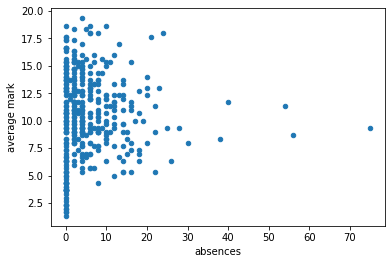

In [120]:
alco.plot('absences', 'average mark', kind='scatter')        #график рассеяния, который показывает, что корреляция между количеством прогулов и средней оценкой отсутствует

In [121]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,health,absences,average mark,drink days
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,3,6,5.666667,2
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,3,4,5.333333,2
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,3,10,8.333333,5
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,5,2,14.666667,2
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,5,4,8.666667,3


In [122]:
def get_mark_cat(mark):     #добавлю категориальные переменные по средним оценкам
    if mark <= 4: 
        return 'Fail' 
    elif  10 >= mark >4 : 
        return 'Satisfactory' 
    elif 16 >= mark >10 : 
        return 'Good' 
    elif mark > 16: 
        return 'Excellent' 

In [123]:
alco['mark category'] = alco['average mark'].apply(get_mark_cat)         #категориальные переменные для колонки average mark

In [124]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,health,absences,average mark,drink days,mark category
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,3,6,5.666667,2,Satisfactory
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,3,4,5.333333,2,Satisfactory
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,3,10,8.333333,5,Satisfactory
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,5,2,14.666667,2,Good
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,5,4,8.666667,3,Satisfactory


In [125]:
alco['mark category'].value_counts()      #посчитаю количество категориальных переменных по оценкам, чтобы потом визуализировать эти данные

Good            191
Satisfactory    159
Excellent        25
Fail             20
Name: mark category, dtype: int64

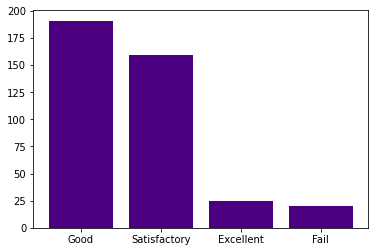

In [142]:
index = ['Good','Satisfactory','Excellent','Fail']
values = [191,159,25,20]
plt.bar(index,values, color = '#4B0082')
plt.show()       #столбчатая диаграма по количеству категориальных переменных в средних оценках

<AxesSubplot:>

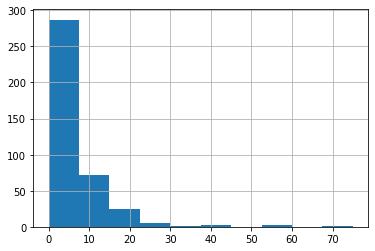

In [130]:
alco['absences'].hist()  #гистограмма по числу пропусков и уже тут мы можем увидеть выбросы в правой части

In [131]:
alco['z-score'] = scipy.stats.zscore(alco['absences'])   #найду Z-оценку для количества пропусков

In [132]:
alco.head()

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,health,absences,average mark,drink days,mark category,z-score
0,F,18,GT3,A,2,0,no,yes,0,False,4,3,4,3,6,5.666667,2,Satisfactory,0.036424
1,F,17,GT3,T,2,0,no,yes,1,False,5,3,3,3,4,5.333333,2,Satisfactory,-0.213796
2,F,15,LE3,T,2,3,no,yes,1,False,4,3,2,3,10,8.333333,5,Satisfactory,0.536865
3,F,15,GT3,T,3,0,yes,yes,1,False,3,2,2,5,2,14.666667,2,Good,-0.464016
4,F,16,GT3,T,2,0,no,yes,0,False,4,3,2,5,4,8.666667,3,Satisfactory,-0.213796


In [133]:
alco['absences'].describe()    #перед тем как найти выбросы для колонки с пропусками, посмотрим основные значения статистики

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [134]:
q3 = np.percentile(alco['absences'], 75)
q1 = np.percentile(alco['absences'], 25)
print(q3, q1)    #квартили

8.0 0.0


In [135]:
iqr = q3 - q1   #интерквартильный размах
print (iqr)

8.0


In [136]:
iqr_threshold_bottom = q1 - 1.5*iqr
iqr_threshold_top = q3 + 1.5*iqr
print (iqr_threshold_bottom, iqr_threshold_top)    #распределение смещённое, слева выбросов не будет

-12.0 20.0


In [137]:
alco[alco['absences'] > iqr_threshold_top].shape   #всего 15 выбросов

(15, 19)

In [138]:
alco[alco['absences'] > iqr_threshold_top]

,sex,age,famsize,Parents coliving,studytime,failures,activities,higher,internet,romantic,fam relations,freetime,go out,health,absences,average mark,drink days,mark category,z-score
40,F,16,LE3,T,2,1,yes,yes,1,False,3,3,3,3,25,9.333333,3,Satisfactory,2.413517
74,F,16,GT3,T,2,0,yes,yes,1,False,4,3,3,5,54,11.333333,6,Good,6.041710
103,F,15,GT3,T,2,0,no,yes,1,False,4,3,5,2,26,6.333333,2,Satisfactory,2.538627
183,F,17,LE3,T,2,0,yes,yes,1,False,5,3,3,1,56,8.666667,5,Satisfactory,6.291930
198,F,17,GT3,T,1,1,no,yes,1,False,4,2,4,2,24,18.000000,5,Excellent,2.288407
205,F,17,GT3,T,3,1,no,yes,1,False,4,4,3,5,28,9.333333,7,Satisfactory,2.788847
216,F,17,GT3,T,2,2,no,yes,1,False,3,4,5,1,22,5.333333,6,Satisfactory,2.038186
260,F,18,GT3,T,2,0,no,yes,1,False,3,1,2,2,21,17.666667,4,Excellent,1.913076
276,F,18,GT3,A,2,0,no,no,1,False,4,1,1,5,75,9.333333,2,Satisfactory,8.669022
277,M,18,GT3,T,1,0,yes,yes,1,False,3,2,4,3,22,9.000000,5,Satisfactory,2.038186


**ВЫВОД: Таким образом анализ не показал корреляции между количеством потребляемого алкоголя и успеваемостью.**

# Спасибо за внимание ❤️